In [2]:
import pandas as pd 

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [4]:
df = pd.read_csv(url, sep = ';')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 # FEATURE ENGINEERING

In [10]:
df['good_wine_quality'] = (df['quality'] >= 7).astype(int)


In [12]:
df['good_wine_quality'].value_counts()


good_wine_quality
0    1382
1     217
Name: count, dtype: int64

In [13]:
X = df.drop(['good_wine_quality', 'quality'], axis = 1)
y = df['good_wine_quality']

   ## EDA & VISUALIZATION

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

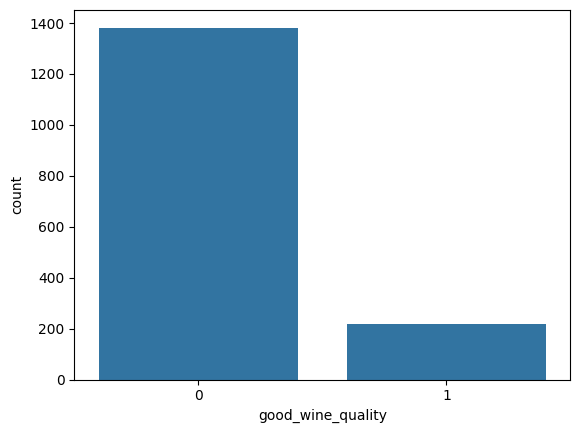

In [16]:
sns.countplot(x = 'good_wine_quality', data = df)
plt.show()

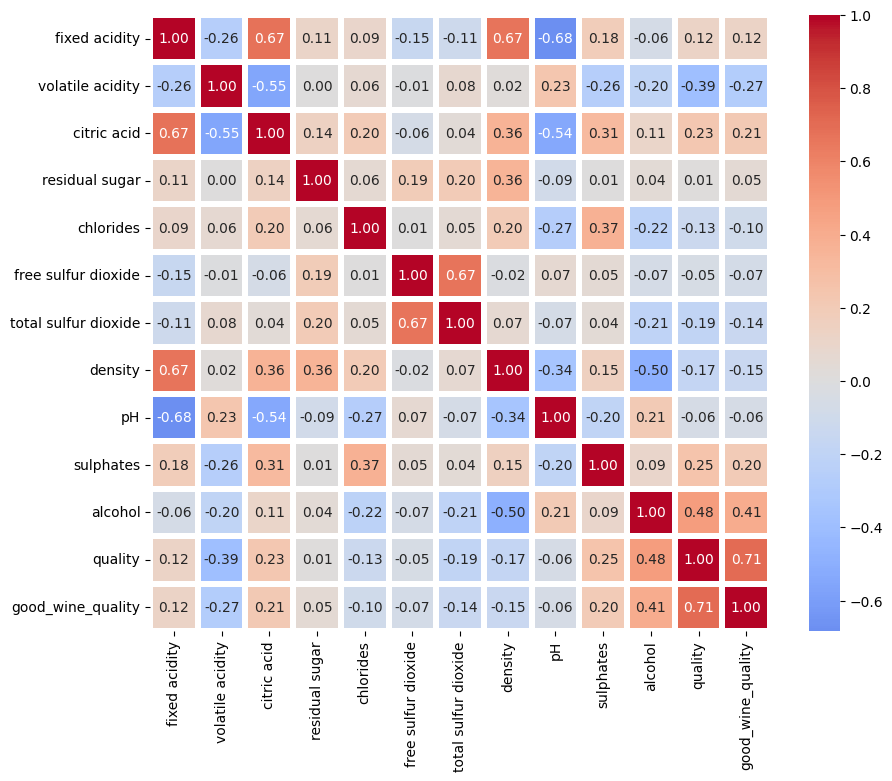

In [21]:
plt.figure(figsize = (10,8))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, cmap = 'coolwarm', center = 0, annot = True, fmt = ".2f", linewidths = 4)
plt.show()

In [23]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good_wine_quality       0
dtype: int64

In [26]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good_wine_quality         int32
dtype: object

In [28]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca  = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
pca.explained_variance_ratio_

array([0.2801769 , 0.17563995])

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
kernels = ['linear', 'rbf', 'poly']
results = {}
for kernel in kernels:
    svm = SVC(kernel = kernel, probability = True, random_state = 42)
    svm.fit(X_train_pca, y_train)
    y_pred = svm.predict(X_test_pca)
    y_proba = svm.predict_proba(X_test_pca)[:,1]
    print(f'\nSVN with {kernel} kernel:')
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    results[kernel] = (y_pred, y_proba)


SVN with linear kernel:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320

ROC AUC: 0.7149092042709064

SVN with rbf kernel:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       273
           1       0.56      0.11      0.18        47

    accuracy                           0.86       320
   macro avg       0.71      0.55      0.55       320
weighted avg       0.82      0.86      0.81       320

ROC AUC: 0.6763307614371444


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


SVN with poly kernel:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320

ROC AUC: 0.7442911698230846


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

## DECISION BOUNDARY

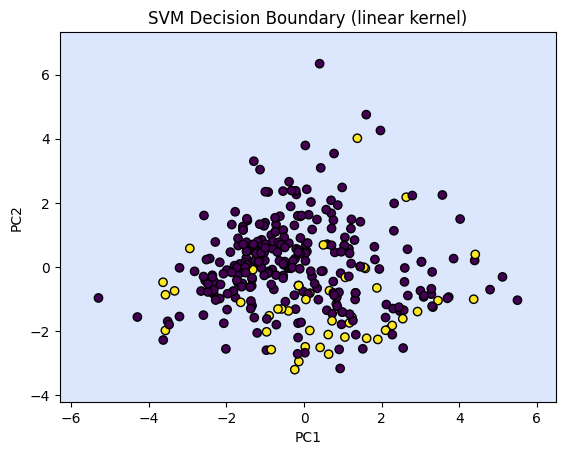

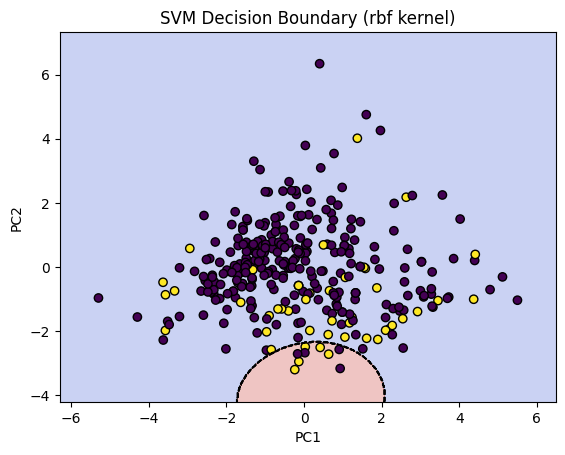

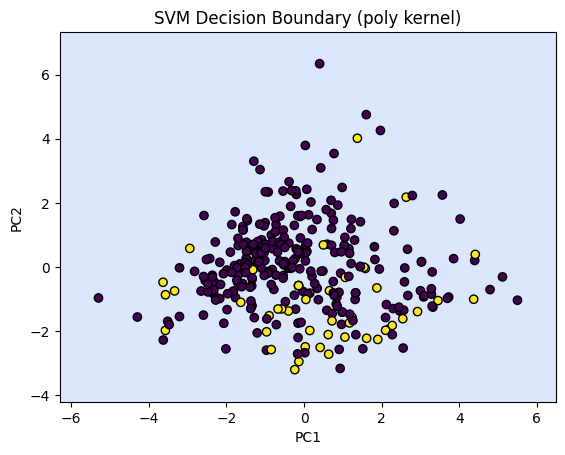

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', linewidths=1, linestyles='--')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

for kernel in kernels:
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train_pca, y_train)
    plot_decision_boundary(svm, X_test_pca, y_test, f"SVM Decision Boundary ({kernel} kernel)")
